# Análisis de resultados experimentales

### Lectura de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

path_linear = 'Resultados/linear_kernel/'


#  Linear
linear_non_stratified_k_fold = pd.read_csv(path_linear + 'non_stratified_k_fold.csv', index_col=0, sep=";")


### Número de características vs. Número de cortes

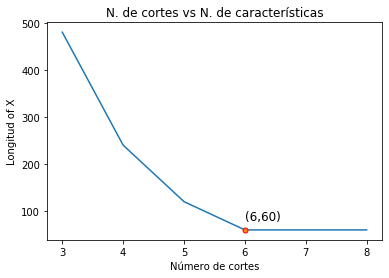

In [2]:
pairs = linear_non_stratified_k_fold[['Number of cuts','Length of X']].copy()
pairs.drop_duplicates(inplace=True)


length_x = pairs['Length of X'].tolist()
number_of_cuts = pairs['Number of cuts'].tolist()

plt.plot(number_of_cuts,
         length_x)

plt.plot(6,60,marker="o", markersize=5, markeredgecolor="red")

plt.text(6, 80, '(6,60)', fontsize=12)
plt.title("N. de cortes vs N. de características")
plt.xlabel("Número de cortes")
plt.ylabel("Longitud of X")
plt.show()

# linear_kernel

## non_stratified_k_fold

#### Matriz de correlaciones entre datos experimentales

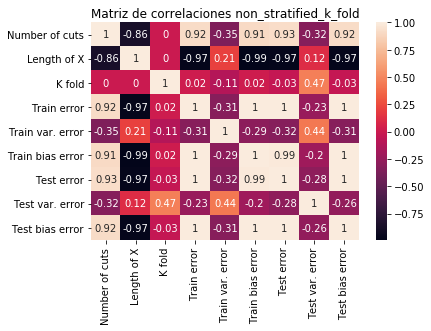

In [3]:
corrMatrix= linear_non_stratified_k_fold.corr()
corrMatrix = corrMatrix.round(2)
sn.heatmap(corrMatrix, annot=True)
plt.title("Matriz de correlaciones non_stratified_k_fold")
plt.show()

### Número de fold vs. Error

#### Training

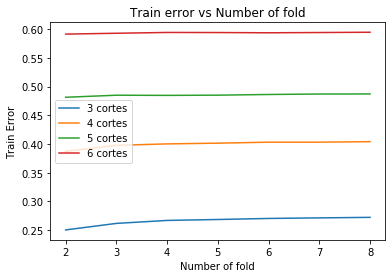

In [4]:
number_of_cuts = range(3,7,1)
number_of_cuts

for cut in number_of_cuts:
    filtered_data = linear_non_stratified_k_fold[(linear_non_stratified_k_fold['Number of cuts'] == cut)]
    plt.plot(filtered_data['K fold'],filtered_data['Train error'], label = f'{cut} cortes')
    
plt.legend(loc="center left")
plt.title("Train error vs Number of fold")
plt.xlabel("Number of fold")
plt.ylabel("Train Error")
plt.show()

#### Test

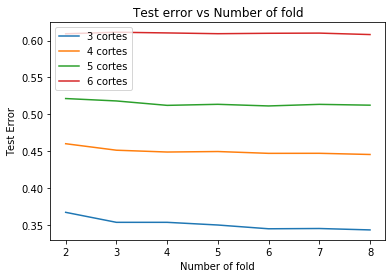

In [5]:
number_of_cuts = range(3,7,1)


for cut in number_of_cuts:
    filtered_data = linear_non_stratified_k_fold[(linear_non_stratified_k_fold['Number of cuts'] == cut)]
    plt.plot(filtered_data['K fold'],filtered_data['Test error'], label = f'{cut} cortes')
    
plt.legend(loc="upper left")
plt.title("Test error vs Number of fold")
plt.xlabel("Number of fold")
plt.ylabel("Test Error")
plt.show()

### Número de cortes vs. Error

#### Training

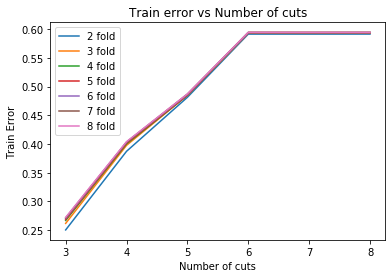

In [6]:
k_fold = linear_non_stratified_k_fold['K fold'].unique()
k_fold

for k_subset in k_fold:
    filtered_data = linear_non_stratified_k_fold[(linear_non_stratified_k_fold['K fold'] == k_subset)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Train error'], label = f'{k_subset} fold')
    
    
plt.legend(loc="upper left")
plt.xlabel("Number of cuts")
plt.title("Train error vs Number of cuts")
plt.ylabel("Train Error")
plt.show()

### Test

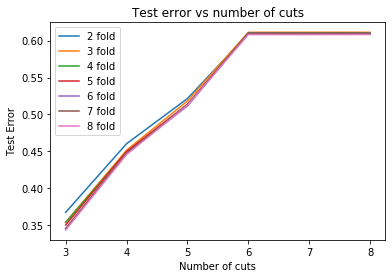

In [7]:
k_fold = linear_non_stratified_k_fold['K fold'].unique()
k_fold


for k_subset in k_fold:
    filtered_data = linear_non_stratified_k_fold[(linear_non_stratified_k_fold['K fold'] == k_subset)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Test error'], label = f'{k_subset} fold')
    
plt.legend(loc="upper left")
plt.xlabel("Number of cuts")
plt.title("Test error vs number of cuts")
plt.ylabel("Test Error")
plt.show()

### Número de cortes vs. Varianza

#### Training

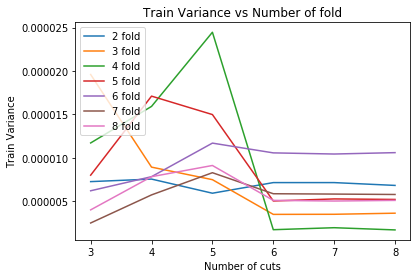

In [8]:
k_fold = linear_non_stratified_k_fold['K fold'].unique()


for subset in k_fold:
    filtered_data = linear_non_stratified_k_fold[(linear_non_stratified_k_fold['K fold'] == subset)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Train var. error'], label = f'{subset} fold')
    
plt.legend(loc="upper left")
plt.title("Train Variance vs Number of fold")
plt.xlabel("Number of cuts")
plt.ylabel("Train Variance")
plt.show()

#### Test

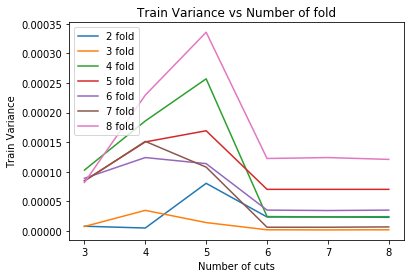

In [9]:
k_fold = linear_non_stratified_k_fold['K fold'].unique()


for subset in k_fold:
    filtered_data = linear_non_stratified_k_fold[(linear_non_stratified_k_fold['K fold'] == subset)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Test var. error'], label = f'{subset} fold')
    
plt.legend(loc="upper left")
plt.title("Train Variance vs Number of fold")
plt.xlabel("Number of cuts")
plt.ylabel("Train Variance")
plt.show()

### Número de cortes vs. Bias

#### Training

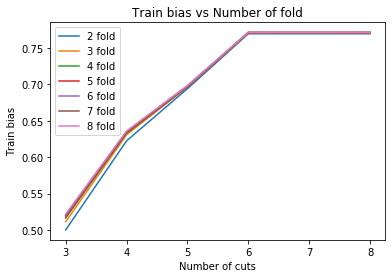

In [10]:
k_fold = linear_non_stratified_k_fold['K fold'].unique()


for subset in k_fold:
    filtered_data = linear_non_stratified_k_fold[(linear_non_stratified_k_fold['K fold'] == subset)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Train bias error'], label = f'{subset} fold')
    
plt.legend(loc="upper left")
plt.title("Train bias vs Number of fold")
plt.xlabel("Number of cuts")
plt.ylabel("Train bias")
plt.show()

#### Test

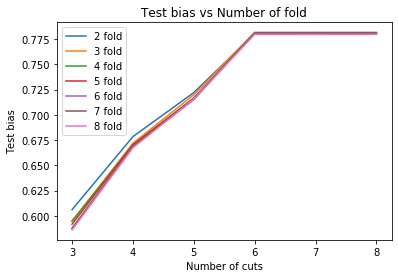

In [11]:
k_fold = linear_non_stratified_k_fold['K fold'].unique()


for subset in k_fold:
    filtered_data = linear_non_stratified_k_fold[(linear_non_stratified_k_fold['K fold'] == subset)]
    plt.plot(filtered_data['Number of cuts'],filtered_data['Test bias error'], label = f'{subset} fold')
    
plt.legend(loc="upper left")
plt.title("Test bias vs Number of fold")
plt.xlabel("Number of cuts")
plt.ylabel("Test bias")
plt.show()

### Number of folds vs Test Variance

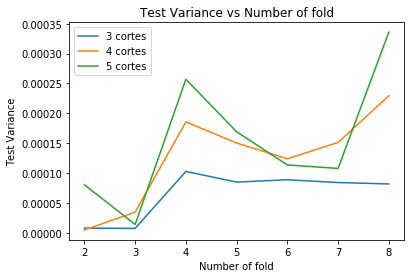

In [12]:
number_of_cuts = range(3,6,1)
number_of_cuts

for cut in number_of_cuts:
    filtered_data = linear_non_stratified_k_fold[(linear_non_stratified_k_fold['Number of cuts'] == cut)]
    plt.plot(filtered_data['K fold'],filtered_data['Test var. error'], label = f'{cut} cortes')
    
plt.legend(loc="upper left")
plt.title("Test Variance vs Number of fold")
plt.xlabel("Number of fold")
plt.ylabel("Test Variance")
plt.show()

### Selección mayor y peor error

In [15]:
linear_non_stratified_k_fold.sort_values(by='Test bias error', ascending = True, inplace = True)
linear_non_stratified_k_fold.head(10)


mejor_modelo_tradeoff = linear_non_stratified_k_fold.iloc[0]
# #eleccion en base de la mayor varianza dentro del top 10 menores bias. Buen trade-off

linear_non_stratified_k_fold.sort_values(by='Test bias error', ascending = False, inplace = True)
linear_non_stratified_k_fold.head(10)

peor_modelo_tradeoff = linear_non_stratified_k_fold.iloc[0]
peor_modelo_tradeoff
#eleccion en base de la menor varianza dentro del top 10 mayores bias. Pesimo trade-off



,Number of cuts,Length of X,K fold,Train error,Train var. error,Train bias error,Train list errors,Test error,Test var. error,Test bias error,Test list errors
29,7,60,3,0.593028,0.000003,0.770081,"[0.590632, 0.595196, 0.593256]",0.611381,0.000002,0.781908,"[0.609643, 0.611973, 0.612528]"
36,8,60,3,0.593120,0.000004,0.770141,"[0.590724, 0.595381, 0.593256]",0.611320,0.000002,0.781868,"[0.609459, 0.611973, 0.612528]"
22,6,60,3,0.593090,0.000003,0.770121,"[0.590724, 0.595289, 0.593256]",0.611320,0.000002,0.781868,"[0.609459, 0.611973, 0.612528]"
37,8,60,4,0.594547,0.000002,0.771068,"[0.595138, 0.592708, 0.594104, 0.596239]",0.610519,0.000024,0.781342,"[0.614286, 0.606061, 0.616408, 0.605322]"
30,7,60,4,0.594465,0.000002,0.771014,"[0.595138, 0.592462, 0.594022, 0.596239]",0.610457,0.000023,0.781303,"[0.614039, 0.606061, 0.616408, 0.605322]"
23,6,60,4,0.594486,0.000002,0.771028,"[0.595138, 0.592626, 0.594022, 0.596157]",0.610396,0.000024,0.781263,"[0.614039, 0.606061, 0.616408, 0.605075]"
26,6,60,7,0.594362,0.000006,0.770945,"[0.59783, 0.589567, 0.593662, 0.594237, 0.5942...",0.610150,0.000006,0.781117,"[0.606897, 0.6125, 0.611207, 0.611638, 0.61060..."
33,7,60,7,0.594321,0.000006,0.770919,"[0.597686, 0.589495, 0.593662, 0.594237, 0.594...",0.610150,0.000006,0.781117,"[0.606897, 0.6125, 0.611207, 0.611638, 0.61060..."
40,8,60,7,0.594373,0.000006,0.770952,"[0.597758, 0.589567, 0.593734, 0.594237, 0.594...",0.610150,0.000007,0.781117,"[0.606466, 0.6125, 0.611638, 0.611207, 0.61103..."
25,6,60,6,0.593903,0.000011,0.770644,"[0.597561, 0.587909, 0.593304, 0.597295, 0.592...",0.609904,0.000035,0.780941,"[0.602512, 0.620103, 0.605691, 0.605691, 0.612..."
